In [1]:
######################
#Librerías necesarias
######################

#Librerías de python y google colab
import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import random
import copy
import itertools
from google.colab import drive

#Pandas
import pandas as pd

#Pytorch
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from skimage import io
from torch.utils.data.dataset import Subset
from torchvision.transforms.transforms import FiveCrop
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import sampler, random_split
from torch.utils.data.dataloader import DataLoader
from torch.nn.modules.pooling import MaxPool2d
from torch.nn.modules.activation import ReLU
from torchsummary import summary

#Scikit Learn
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
#Asociar la cuenta de Google Drive con el cuaderno para leer los archivos .tar

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Extracción de los archivos .tar

data_dir = "/content/data"

#Extracción de train (cambiar directorio)
tar = tarfile.open("/content/drive/MyDrive/TFG/train_set.tar")
tar.extractall(data_dir)
tar.close()

#Extraemos test (cambiar directorio)
tar = tarfile.open("/content/drive/MyDrive/TFG/val_set.tar")
tar.extractall(data_dir)
tar.close()

In [4]:

#Para el cáclulo de los pesos, es necesario disponer de las etiquetas sin crear una base de datos

train_annotations_path = "/content/data/train_set/annotations"
train_dir = os.listdir(train_annotations_path)
val_annotations_path = "/content/data/val_set/annotations"
dir_val = os.listdir(val_annotations_path)


#Si el archivo contiene exp.npy, metemos su ruta en el array 
train_npy=[]
val_npy=[]

for i in range(len(train_dir)):
  if 'exp.npy' in train_dir[i]:
    train_npy.append(train_dir[i])

for i in range(len(dir_val)):
  if 'exp.npy' in dir_val[i]:
    val_npy.append(dir_val[i])

#Ordenamos el array mirando su primer elemento
train_npy.sort(key=lambda x: [int(x[0:-8])])
print(len(train_npy))

val_npy.sort(key=lambda x: [int(x[0:-8])])
print(len(val_npy))


#Función que procesa el archivo npy y obtiene su valor
def npy_loader(path):
   sample = np.load(path)
   return sample

#Guardamos las etiquetas en el array clases
train_classes=[]
for item in range(len(train_npy)):
  train_classes.append(npy_loader(train_annotations_path + "/" + train_npy[item]))

val_classes=[]
for item in range(len(val_npy)):
  #print(item)
  val_classes.append(npy_loader(val_annotations_path + "/" + val_npy[item]))


287651
3999


In [5]:
#Se procede de la misma forma con las imágenes

train_images_path = "/content/data/train_set/images"
train_images = os.listdir(train_images_path)
train_images.sort(key=lambda x: [int(x[0:-4])])

val_images_path = "/content/data/val_set/images"
val_images = os.listdir(val_images_path)
val_images.sort(key=lambda x: [int(x[0:-4])])

In [6]:
#Creación del archivo CSV que contiene la ruta a las imágenes y su etiqueta

import pandas as pd

Num_total_train=len(train_images)


#Guardamos el nombre del archivo y su etiqueta en un dataframe de pandas
data={}
data['images']= train_images
data['label']= train_classes

print(len(data['images']))
print(len(data['label']))
data_df = pd.DataFrame(data, columns=['images', 'label'])
print(data_df)

data_df.to_csv("AffectNet.csv", index=False, header = False)


val_data={}
val_data['images']= val_images
val_data['label']= val_classes

val_df = pd.DataFrame(val_data, columns=['images', 'label'])
print(val_df)

val_df.to_csv("AffectNet_val.csv", index=False, header = False)








287651
287651
            images label
0            0.jpg     1
1            1.jpg     0
2            2.jpg     0
3            3.jpg     1
4            5.jpg     6
...            ...   ...
287646  414792.jpg     2
287647  414793.jpg     0
287648  414794.jpg     2
287649  414795.jpg     2
287650  414796.jpg     1

[287651 rows x 2 columns]
        images label
0        0.jpg     0
1        1.jpg     0
2        2.jpg     4
3        3.jpg     0
4        4.jpg     2
...        ...   ...
3994  5489.jpg     0
3995  5490.jpg     6
3996  5492.jpg     6
3997  5494.jpg     3
3998  5495.jpg     2

[3999 rows x 2 columns]


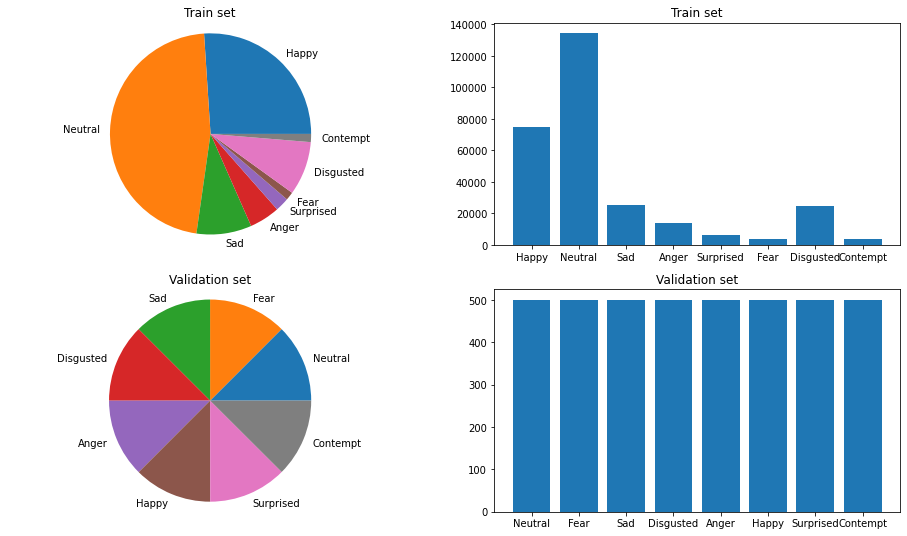

In [7]:
#Obtenemos las etiquetas como lista (para comvertirlas en palabras) y el número de veces que se repiten
etiquetas_train= data_df['label'].value_counts().index.tolist()
veces_train = data_df['label'].value_counts().sort_index()



etiquetas_val = val_df['label'].value_counts().index.tolist()
veces_val = val_df['label'].value_counts().sort_index()


labels_map ={
    0: "Neutral",
    1: "Happy",
    2: "Sad",
    3: "Surprised",
    4: "Fear",
    5: "Disgusted",
    6: "Anger",
    7: "Contempt",
   }

train_array=np.array(etiquetas_train)
train_etiquetas=[]

#Guardamos las etiquetas de cada muestra en formato string
for i in range(len(train_array)):
  train_etiquetas.append(labels_map[train_array[i].astype('int')])



val_array=np.array(etiquetas_val)
val_etiquetas=[]

for i in range(len(val_array)):
  val_etiquetas.append(labels_map[val_array[i].astype('int')])


fig= plt.figure(figsize=(16,9)) 
plt.subplot(2,2,1)
plt.pie(veces_train, labels = train_etiquetas)
plt.axis('equal')
plt.title("Train set")


plt.subplot(2,2,2)
plt.bar(train_etiquetas, veces_train)
plt.title("Train set")


plt.subplot(2,2,3)
plt.pie(veces_val, labels = val_etiquetas)
plt.axis('equal')
plt.title("Validation set")

plt.subplot(2,2,4)
plt.bar(val_etiquetas, veces_val)
plt.title("Validation set")

plt.show()

